In [6]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

C:\Users\gabri\AppData\Local\Temp\ipykernel_14664\1554228395.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/gabri/projects/TPS/TP3_ProjetoBloco/Monitoramento_Dengue_Streamlit/data_sus/df_dengue_2023_2024.csv')


Estatísticas Descritivas:
           casos_est  casos_est_min  casos_est_max          casos  \
count  297395.000000  297395.000000  297395.000000  297395.000000   
mean       26.771504      26.581076      27.693969      26.533412   
std       184.895521     184.493485     187.422369     184.286772   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         6.000000       6.000000       7.000000       6.000000   
max      9942.000000    9942.000000    9942.000000    9942.000000   

       proba_disse>1  incidência_100khab   disseminação     população  \
count  297395.000000       297395.000000  297395.000000  2.973950e+05   
mean        0.303497           80.685704       1.162670  3.586540e+04   
std         0.370238          249.283741       3.019728  1.869294e+05   
min         0.000000            0.000000       0.000000  8.3

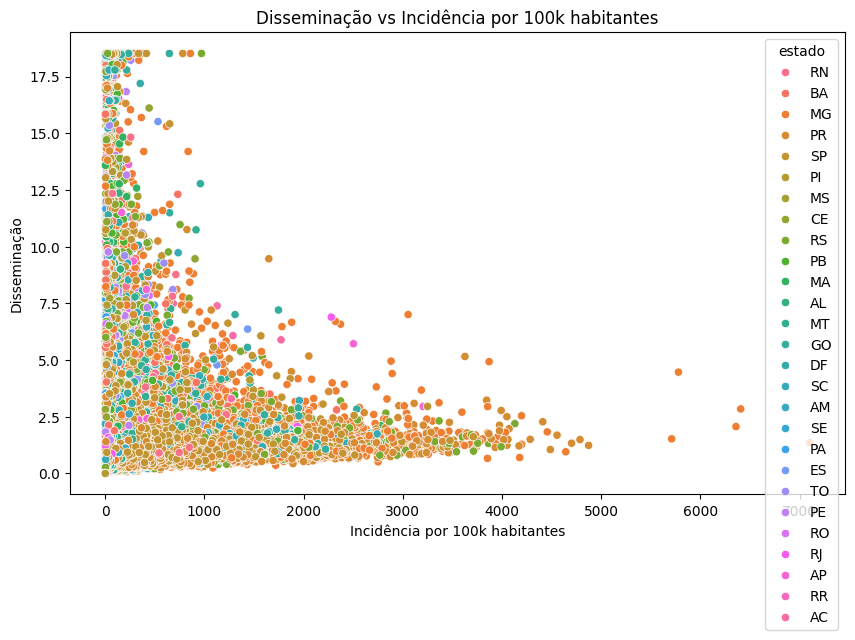

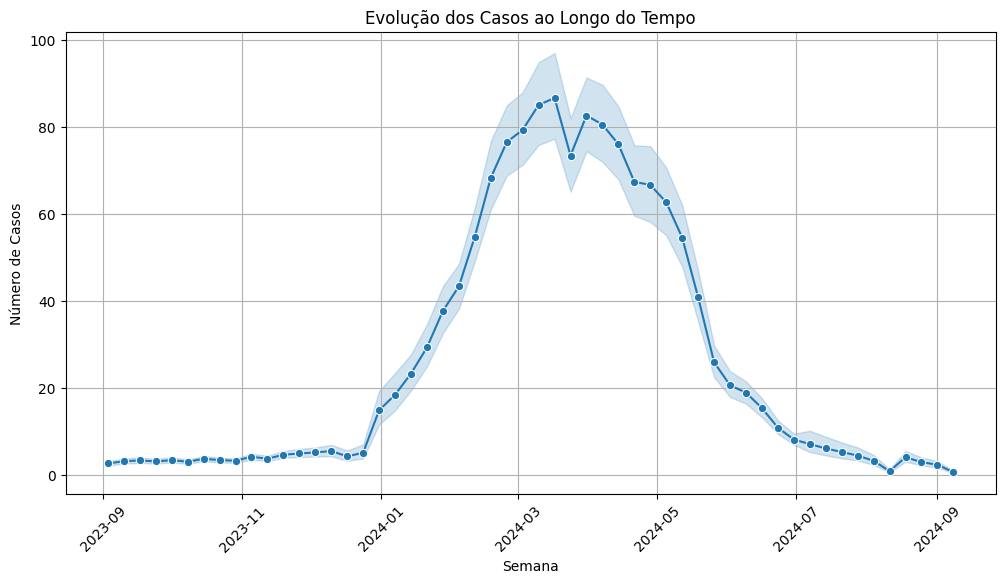

                            OLS Regression Results                            
Dep. Variable:                  casos   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.97e-32
Time:                        12:57:04   Log-Likelihood:            -1.9733e+06
No. Observations:              297395   AIC:                         3.947e+06
Df Residuals:                  297393   BIC:                         3.947e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7811      0.666     29.703      0.0

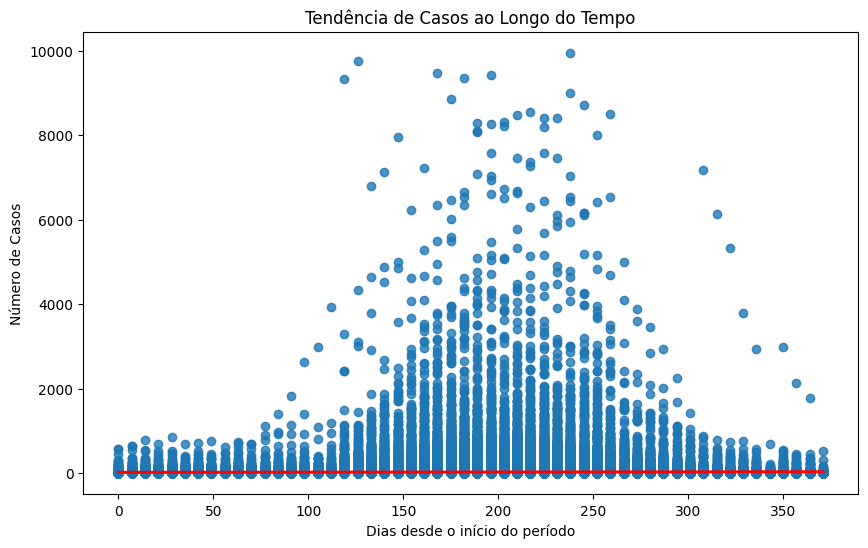

Correlação entre temperatura média e incidência: -0.033348669266925285


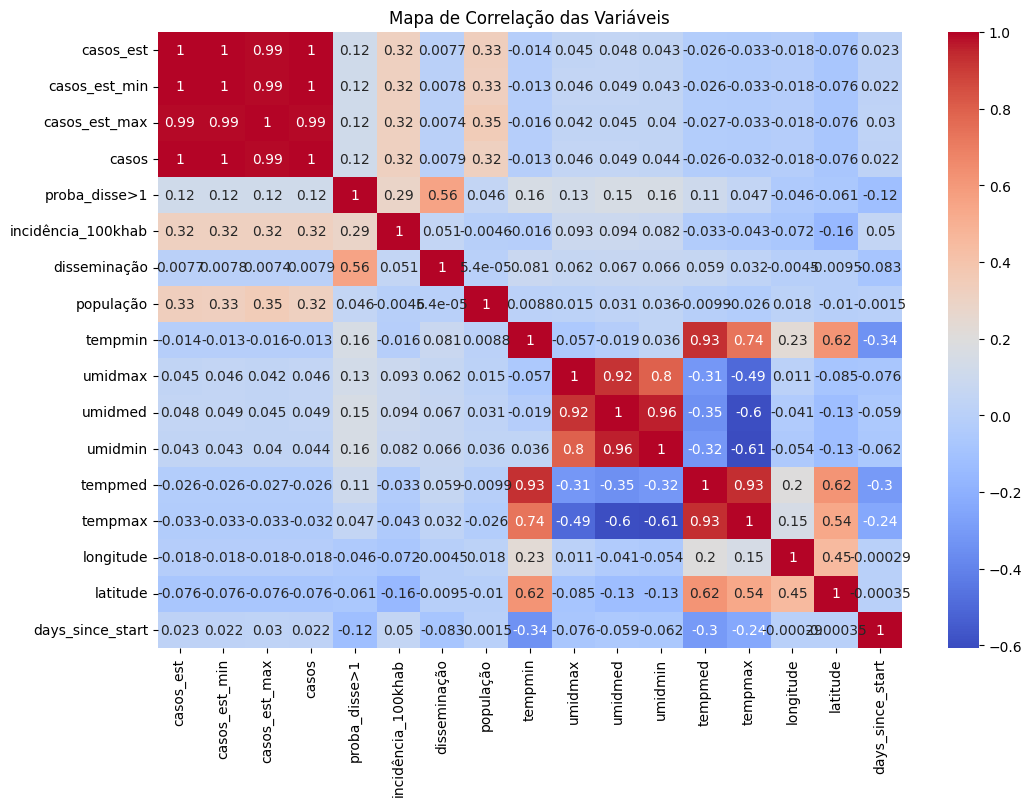

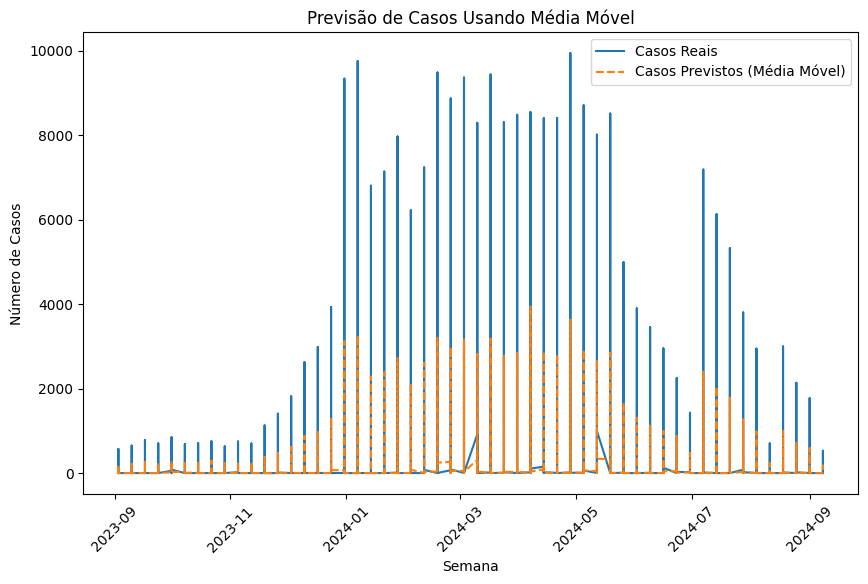

Dados Ausentes por Coluna:
data_week                 0
casos_est                 0
casos_est_min             0
casos_est_max             0
casos                     0
proba_disse>1             0
incidência_100khab        0
disseminação              0
população                 0
tempmin                   0
umidmax                   0
umidmed                   0
umidmin                   0
tempmed                   0
tempmax                   0
municipio                 0
estado                21012
longitude             21012
latitude              21012
days_since_start          0
casos_previstos           2
dtype: int64
Número de outliers em 'casos': 48057


In [31]:


# Carregar o DataFrame
df = pd.read_csv('/Users/gabri/projects/TPS/TP3_ProjetoBloco/Monitoramento_Dengue_Streamlit/data_sus/df_dengue_2023_2024.csv')

# Converter a coluna 'data_week' para o tipo datetime
df['data_week'] = pd.to_datetime(df['data_week'], format='%Y-%m-%d')

# Criar uma nova coluna que representa o número de dias desde o início
df['days_since_start'] = (df['data_week'] - df['data_week'].min()).dt.days

# Remover colunas categóricas que não podem ser usadas diretamente em regressão (como 'municipio' e 'estado')
df_numeric = df.select_dtypes(include=[np.number])

# 1. Estatísticas Descritivas
desc_stats = df_numeric.describe()
print("Estatísticas Descritivas:")
print(desc_stats)

# 2. Visualizações Gráficas

# Gráfico de dispersão da incidência por 100k habitantes vs. disseminação
plt.figure(figsize=(10,6))
sns.scatterplot(x='incidência_100khab', y='disseminação', hue='estado', data=df)
plt.title('Disseminação vs Incidência por 100k habitantes')
plt.xlabel('Incidência por 100k habitantes')
plt.ylabel('Disseminação')
plt.show()


# Gráfico de linha da evolução de casos ao longo do tempo
plt.figure(figsize=(12,6))
sns.lineplot(x='data_week', y='casos', data=df, marker='o')
plt.title('Evolução dos Casos ao Longo do Tempo')
plt.xlabel('Semana')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Análise de Tendências
# Usar a nova coluna 'days_since_start' para análise de tendência com regressão linear

X = df_numeric['days_since_start'].values.reshape(-1, 1)
y = df_numeric['casos']

# Adicionar uma constante para o modelo
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Plot da linha de tendência
plt.figure(figsize=(10,6))
sns.regplot(x='days_since_start', y='casos', data=df, line_kws={"color":"red"})
plt.title('Tendência de Casos ao Longo do Tempo')
plt.xlabel('Dias desde o início do período')
plt.ylabel('Número de Casos')
plt.show()

# 4. Correlação entre variáveis
# Correlação entre temperatura média e incidência por 100k habitantes
corr_temp_incidencia, _ = pearsonr(df_numeric['tempmed'], df_numeric['incidência_100khab'])
print(f"Correlação entre temperatura média e incidência: {corr_temp_incidencia}")

# Heatmap de correlações entre variáveis numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação das Variáveis')
plt.show()

# 5. Previsões de casos futuros (exemplo simples de média móvel)
df['casos_previstos'] = df['casos'].rolling(window=3).mean()
plt.figure(figsize=(10,6))
plt.plot(df['data_week'], df['casos'], label='Casos Reais')
plt.plot(df['data_week'], df['casos_previstos'], label='Casos Previstos (Média Móvel)', linestyle='--')
plt.title('Previsão de Casos Usando Média Móvel')
plt.xlabel('Semana')
plt.ylabel('Número de Casos')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 6. Qualidade dos Dados

# Verificar dados ausentes
missing_data = df.isnull().sum()
print("Dados Ausentes por Coluna:")
print(missing_data)

# Verificar outliers em 'casos' usando o IQR
Q1 = df['casos'].quantile(0.25)
Q3 = df['casos'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['casos'] < (Q1 - 1.5 * IQR)) | (df['casos'] > (Q3 + 1.5 * IQR))]
print(f"Número de outliers em 'casos': {len(outliers)}")



